<a href="https://colab.research.google.com/github/Kalana-Lakshan/tensorflow-learning/blob/main/cat_and_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od
import time

In [4]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kalanalakshan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:00<00:00, 968MB/s] 


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [6]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [7]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset="training",
                                                         validation_split = 0.1,
                                                         seed=42)
validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset="validation",
                                                         validation_split = 0.1,
                                                         seed=42)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [10]:
class_names = train_data.class_names

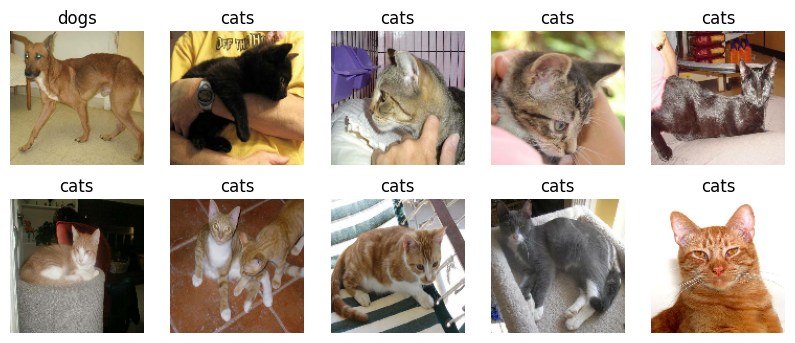

In [14]:
#plot images
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

Data Preprocessing

In [17]:
#Feature scaling
train_data = train_data.map(lambda x,y: (x/255,y))
validation_data = validation_data.map(lambda x,y: (x/255,y))
test_data = test_data.map(lambda x,y: (x/255,y))

In [18]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[1.3302419e-03 1.0226679e-03 5.1517074e-04]
   [1.4389612e-03 1.1313872e-03 6.2389008e-04]
   [1.3927936e-03 1.0852197e-03 5.7772250e-04]
   ...
   [9.0309198e-04 9.7998546e-04 8.7233458e-04]
   [8.4510766e-04 9.2200114e-04 8.1435026e-04]
   [8.2276051e-04 8.9965400e-04 7.9200306e-04]]

  [[1.4093738e-03 1.1017998e-03 5.9430266e-04]
   [1.4217617e-03 1.1141878e-03 6.0669059e-04]
   [1.5002043e-03 1.1926303e-03 6.8513316e-04]
   ...
   [9.1765734e-04 9.9455088e-04 8.8689994e-04]
   [8.0138736e-04 8.7828084e-04 7.7062997e-04]
   [8.5326185e-04 9.3015539e-04 8.2250446e-04]]

  [[1.5176210e-03 1.2100469e-03 7.0254982e-04]
   [1.4724460e-03 1.1648721e-03 6.5737491e-04]
   [1.5237763e-03 1.2162024e-03 7.0870522e-04]
   ...
   [9.2166814e-04 9.9856162e-04 8.9091074e-04]
   [8.1590773e-04 8.9280121e-04 7.8515033e-04]
   [8.0757582e-04 8.8446937e-04 7.7681843e-04]]

  ...

  [[2.2760339e-03 1.8608088e-03 1.1380099e-03]
   [2.2863757e-03 1.8711508e-03 1.1483519e-03]
   [2.2814828e-

In [19]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2)
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Building

In [20]:
model = tf.keras.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(32,activation = 'relu'))

model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

Model compilation

In [22]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [23]:
start_time = time.time()

history = model.fit(
    train_data,
    epochs=20,
    validation_data = validation_data

)

end_time = time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.4918 - loss: 0.6954 - val_accuracy: 0.5050 - val_loss: 0.6932
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.5147 - loss: 0.6935 - val_accuracy: 0.4950 - val_loss: 0.6933
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5053 - loss: 0.6931 - val_accuracy: 0.4950 - val_loss: 0.6962
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5078 - loss: 0.6938 - val_accuracy: 0.5050 - val_loss: 0.6932
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.4844 - loss: 0.6941 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.5027 - loss: 0.6931 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5049 - loss: 0.6932 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.5027 - loss: 0.6932 - val_a

In [24]:
end_time-start_time

186.3827338218689

In [26]:
history.history

{'accuracy': [0.4915277659893036,
  0.5062500238418579,
  0.4972222149372101,
  0.5024999976158142,
  0.4958333373069763,
  0.4968055486679077,
  0.496111124753952,
  0.49361109733581543,
  0.49541667103767395,
  0.4893055558204651,
  0.48569443821907043,
  0.4933333396911621,
  0.4952777922153473,
  0.49194443225860596,
  0.49861112236976624,
  0.49666666984558105,
  0.49638888239860535,
  0.49638888239860535,
  0.4908333420753479,
  0.4958333373069763],
 'loss': [0.6953011751174927,
  0.6934035420417786,
  0.6933122277259827,
  0.6937412023544312,
  0.6933813095092773,
  0.6931741833686829,
  0.6931834816932678,
  0.6931824684143066,
  0.6931959986686707,
  0.6933782696723938,
  0.6931926608085632,
  0.6931833624839783,
  0.693168580532074,
  0.6931754350662231,
  0.6931968927383423,
  0.6931852102279663,
  0.6931689381599426,
  0.6931803822517395,
  0.6931788325309753,
  0.6931672096252441],
 'val_accuracy': [0.5049999952316284,
  0.4950000047683716,
  0.4950000047683716,
  0.504999